In [0]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import nltk
from nltk.tokenize import sent_tokenize
import csv
% matplotlib inline

In [0]:
# Mount drive for data reading
# This will prompt for authorization.
drive.mount('/content/drive')
path = "/content/drive/Shared drives/CIS 519 Project/Code/Reddit Dataset/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv(path + 'reddit_comments.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df.head()

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,removal_reason
0,and then lie under oath,NaN,NaN,NaN,dgreene13,NaN,NaN,1175392040,t5_6,t3_1edja,t1_c1edkx,0,1473738021,0,0,c1edq3,reddit.com,0,NaN,NaN,NaN
1,"Wooa, that was cool.",NaN,NaN,NaN,berlinbrown,NaN,NaN,1175403616,t5_6,t3_1ebt9,t3_1ebt9,0,1473738038,0,0,c1eeoa,reddit.com,0,NaN,NaN,NaN
2,Download collection of Pink! ringtones to your...,NaN,NaN,NaN,leesmith,NaN,NaN,1175410431,t5_6,t3_1ef4w,t3_1ef4w,0,1473738047,0,0,c1ef4z,reddit.com,0,NaN,NaN,NaN
3,"Note that ""WHoA"" will have 4 boxes. ""WoW"" will...",NaN,NaN,NaN,Worstcasescenario,NaN,NaN,1175446712,t5_6,t3_1efqi,t1_c1eh0d,0,1473738097,0,0,c1ehtj,reddit.com,0,NaN,NaN,NaN
4,I love Magritte's stuff.,NaN,NaN,NaN,HiggsBoson,NaN,NaN,1175458317,t5_6,t3_1ef3d,t1_c1ehip,0,1473738119,0,0,c1ej06,reddit.com,0,NaN,NaN,NaN


In [0]:
df_with_comments = df[(df.body != '[removed]') & (df.body != '[deleted]')]

In [0]:
# Select random 1000 records from the input 
#random_subset_df = df_with_comments.sample(n = 1000, random_state=200) 

random_subset_df = pd.DataFrame(df_with_comments['body'])

In [0]:
random_subset_df.head()

,body
0,and then lie under oath
1,"Wooa, that was cool."
2,Download collection of Pink! ringtones to your...
3,"Note that ""WHoA"" will have 4 boxes. ""WoW"" will..."
4,I love Magritte's stuff.


In [0]:
MALE_WORDS = set([
    'guy','spokesman','chairman',"men's",'men','him',"he's",'his',
    'boy','boyfriend','boyfriends','boys','brother','brothers','dad',
    'dads','dude','father','fathers','fiance','gentleman','gentlemen',
    'god','grandfather','grandpa','grandson','groom','he','himself',
    'husband','husbands','king','male','man','mr','nephew','nephews',
    'priest','prince','son','sons','uncle','uncles','waiter','widower',
    'widowers'
])

FEMALE_WORDS = set([
    'heroine','spokeswoman','chairwoman',"women's",'actress','women',
    "she's",'her','aunt','aunts','bride','daughter','daughters','female',
    'fiancee','girl','girlfriend','girlfriends','girls','goddess',
    'granddaughter','grandma','grandmother','herself','ladies','lady',
    'lady','mom','moms','mother','mothers','mrs','ms','niece','nieces',
    'priestess','princess','queens','she','sister','sisters','waitress',
    'widow','widows','wife','wives','woman'
])

In [0]:
# Label comments as male or female
def is_male(comment):
  if any(ele in comment.split() for ele in MALE_WORDS):
    return 1
  else:
    return 0

def is_female(comment):
  if any(ele in comment.split() for ele in FEMALE_WORDS):
    return 1
  else:
    return 0

print(is_male('and he lie under oath'))
print(is_male('and she lie under oath'))
print(is_female('and he lie under oath'))
print(is_female('and she lie under oath'))

1
0
0
1


In [0]:
random_subset_df['male'] = random_subset_df['body'].apply(lambda x: is_male(str(x)))
random_subset_df['female'] = random_subset_df['body'].apply(lambda x: is_female(str(x)))

In [0]:
random_subset_df.head()

,body,male,female
0,and then lie under oath,0,0
1,"Wooa, that was cool.",0,0
2,Download collection of Pink! ringtones to your cell phone.,0,0
3,"Note that ""WHoA"" will have 4 boxes. ""WoW"" will have two.",0,0
4,I love Magritte's stuff.,0,0


In [0]:
random_subset_df.groupby('male').count()

,body,female
male,,
0,1213410,1213537
1,187258,187258


In [0]:
random_subset_df.groupby('female').count()

,body,male
female,,
0,1333007,1333134
1,67661,67661


In [0]:
pd.set_option('display.max_colwidth',1000)

# Only male comments
male_subset_df = random_subset_df[(random_subset_df['male'] == 1) & (random_subset_df['female'] == 0)]
male_subset_df.head()

,body,male,female
5,"Unfortunately when it comes down to ""his word against hers"" I have to side with him (Assuming he is accused of rape), because the case needs to be proved beyond a reasonable doubt. I may be pretty sure that he is lying, but there are still reasonable doubts.\r\n\r\nI won't like it, but it is the best of several wrong alternatives.",1,0
7,"It is clear, both sides can't think straight. This guy picked a couple of questions out of the 40? Here is a question that is siding against the GOP:\r\n\r\n""37. Based on what you know about the case of eight federal prosecutors being fired from the Justice Department, do you think Alberto Gonzales should stay in his job as attorney general or should he leave -- either by resigning or by being fired?""",1,0
17,"As they said he would in 2006, 2005, 2004, 2003, 2004...",1,0
27,"Nobody in LA perceived those as a threat because they are used to dealing with nuclear bomb threats and presidential candidate assassinations and nerve agents in the gas lines. \r\n\r\nI guess the best way they could be educated not to respond like idiots would be by telling them to trust Jack. I mean, he's earned it.",1,0
28,Making a judgement about a nationwide company based on experience with 1 (one) store? This guy is an idiot.,1,0


In [0]:
# Only female comments
female_subset_df = random_subset_df[(random_subset_df['female'] == 1) & (random_subset_df['male'] == 0)]
female_subset_df.head()

,body,male,female
11,"&gt; So where does she get her funding?\r\n\r\nSame place the ""Holy Blood, Holy Grail"" people got it?",0,1
38,"I read Time when I was 12 and although I don't sleep with my sister by any means, it allowed me to take a step back and reexamine the world I'd grown to accept around me. It was, for me at that age, quite a life changer. But that was a long time ago and I fear I may not like it so much today. I reread Ender's Game and while it was great, it wasn't the same as reading it when I was a child.",0,1
52,&gt; I saw her game when she ran for senator in NY.\r\n\r\nWhat game was that?,0,1
88,Oops - my bad.\r\n\r\nEDIT: My bad on Internet. Where does she mention Cable TV?,0,1
95,"She talks about her husband, I don't think there's any mystery, it's a woman.",0,1


In [0]:
# Get n comments with male words and m comments with female words

no_male = 400
no_female = 600

random_male_subset_df = male_subset_df.sample(n = 400, random_state=200) 
random_female_subset_df = female_subset_df.sample(n = 600, random_state=200) 
final_subset_df = pd.concat([random_male_subset_df, random_female_subset_df])

In [0]:
'''
from datetime import datetime, timezone

def utc_to_local(utc_dt):
    #return utc_dt.replace(tzinfo=timezone.utc).astimezone(tz=None)
    return datetime.utcfromtimestamp(utc_dt).strftime('%Y-%m-%d %H:%M:%S')

random_subset_df['created_date'] = random_subset_df['created_utc'].apply(lambda x: utc_to_local(x))
random_subset_df.head()
'''

,body,score_hidden,archived,name,author,author_flair_text,downs,created_utc,subreddit_id,link_id,parent_id,score,retrieved_on,controversiality,gilded,id,subreddit,ups,distinguished,author_flair_css_class,removal_reason,created_date
15762,"A few years ago, Val Venus and Rikishi of the ...",NaN,NaN,NaN,guriboysf,NaN,NaN,1191883168,t5_6,t3_2xzef,t1_c2xztj,17,1473778133,0,0,c2y054,reddit.com,17,NaN,NaN,NaN,2007-10-08 22:39:28
450334,aye. I was about to come in here and say that.,NaN,NaN,NaN,jaggederest,NaN,NaN,1188011840,t5_2fwo,t3_2ihuw,t1_c2iitc,1,1473766490,0,0,c2iiuo,programming,1,NaN,NaN,NaN,2007-08-25 03:17:20
6125,He forgot to add the 's' at the end of that se...,NaN,NaN,NaN,ashmodai,NaN,NaN,1187880910,t5_6,t3_2hqtq,t3_2hqtq,1,1473766104,0,0,c2hywg,reddit.com,1,NaN,NaN,NaN,2007-08-23 14:55:10
988014,ZOMG TAHNKS LOL,NaN,NaN,NaN,indigoshift,NaN,NaN,1191443098,t5_6,t3_2w7ib,t3_2w7ib,1,1473776889,0,0,c2w9hx,reddit.com,1,NaN,NaN,NaN,2007-10-03 20:24:58
1000019,The prosecutor has to be soulless.,NaN,NaN,NaN,CommentMan,NaN,NaN,1181083215,t5_6,t3_1w6og,t3_1w6og,9,1473751061,0,0,c1w73b,reddit.com,9,NaN,NaN,NaN,2007-06-05 22:40:15


In [0]:
final_subset_df.head()

,body,male,female
519289,&gt;This isn't why we 'overlook' this. Have you heard the man talk? He isn't a single-message candidate.\r\n\r\nClearly he's not. It's just that on most other issues he's absolutely bonkers.\r\n\r\nLike on the role of church in state.,1,0
584662,"just saw on MSNBC breaking news (about 2:00pm eastern time) that there was some Al Q threat in Congress/DC - CONVENIENTLY when the FISA bill is being debated and in addition, some GOP asshole is inferring that people leave DC and ""don't come back until after 9.11"" [sorry I don't remember his name]",1,0
675071,"You know, come to think of it, if he didn't do all of this, someone else *would* have.",1,0
27806,"Do what I did and read the specs on the phone you sent me a picture of.\r\n\r\n&gt;why was he so scared to go to a war zone? \r\n\r\nRead read read before you comment. Read read read before you post. I'll make it easy for you. From Wiki:\r\n\r\nIn September of 2004, while investigating reports that Abu Mousab al-Zarqawi's nascent ""al-Qaeda in Iraq"" group was openly claiming control of the Haifa Street area of Baghdad, Ware was briefly held at gunpoint by terrorists loyal to Zarqawi who had pulled pins from live grenades and forced his car to stop. The men dragged him from the car and stood him beneath one of the banners, intending to film the execution with his own video camera. By threatening them with immediate and violent retaliation, his local guides, including members of the Ba'athist Party, were able to win his release. (Ware has stated that had this happened only a few months later, when Zarqawi's group had grown stronger, he would have been killed.)\r\n\r\nHe is one of the ...",1,0
1330303,"once and eye-stabber, always an eye-stabber!\r\n\r\nThat's what my grandpa always used to say!",1,0


In [0]:
# Random sampling seems to maintain the distribution. So exporting the subset to CSV on drive
final_subset_df.to_csv(path + 'reddit_1000.csv', index=False)

In [0]:
# Summary Statistics
import matplotlib.pyplot as plt
% matplotlib inline

toxic_perc = 0.227
non_toxic_perc = 1-toxic_perc
total_count = 1000

#Male-Female Distribution for Toxicity
toxic_female = 155
non_toxic_female = 445
toxic_male = 72
non_toxic_male = 328

toxic_female_perc = toxic_female/(toxic_female + non_toxic_female)
toxic_male_perc = toxic_male/(toxic_male +non_toxic_male)



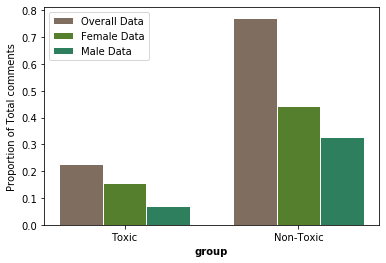

In [0]:
#Combine plots 
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [toxic_perc, non_toxic_perc] #Overall 
bars2 = [toxic_female/total_count,non_toxic_female/total_count] #For females
bars3 = [toxic_male/total_count, non_toxic_male/total_count] #For males
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Overall Data')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Female Data')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Male Data')
plt.ylabel('Proportion of Total comments')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Toxic', 'Non-Toxic'])
 
# Create legend & Show graphic
plt.legend()
plt.show()